In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [21]:
?join()

mutate-joins {dplyr},R Documentation
"x, y","A pair of data frames, data frame extensions (e.g. a tibble), or lazy data frames (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
by,"A join specification created with join_by(), or a character vector of variables to join by. If NULL, the default, ⁠*_join()⁠ will perform a natural join, using all variables in common across x and y. A message lists the variables so that you can check they're correct; suppress the message by supplying by explicitly. To join on different variables between x and y, use a join_by() specification. For example, join_by(a == b) will match x$a to y$b. To join by multiple variables, use a join_by() specification with multiple expressions. For example, join_by(a == b, c == d) will match x$a to y$b and x$c to y$d. If the column names are the same between x and y, you can shorten this by listing only the variable names, like join_by(a, c). join_by() can also be used to perform inequality, rolling, and overlap joins. See the documentation at ?join_by for details on these types of joins. For simple equality joins, you can alternatively specify a character vector of variable names to join by. For example, by = c(""a"", ""b"") joins x$a to y$a and x$b to y$b. If variable names differ between x and y, use a named character vector like by = c(""x_a"" = ""y_a"", ""x_b"" = ""y_b""). To perform a cross-join, generating all combinations of x and y, see cross_join()."
copy,"If x and y are not from the same data source, and copy is TRUE, then y will be copied into the same src as x. This allows you to join tables across srcs, but it is a potentially expensive operation so you must opt into it."
suffix,"If there are non-joined duplicate variables in x and y, these suffixes will be added to the output to disambiguate them. Should be a character vector of length 2."
...,Other parameters passed onto methods.
keep,"Should the join keys from both x and y be preserved in the output? If NULL, the default, joins on equality retain only the keys from x, while joins on inequality retain the keys from both inputs. If TRUE, all keys from both inputs are retained. If FALSE, only keys from x are retained. For right and full joins, the data in key columns corresponding to rows that only exist in y are merged into the key columns from x. Can't be used when joining on inequality conditions."
na_matches,"Should two NA or two NaN values match? ""na"", the default, treats two NA or two NaN values as equal, like %in%, match(), and merge(). ""never"" treats two NA or two NaN values as different, and will never match them together or to any other values. This is similar to joins for database sources and to base::merge(incomparables = NA)."
multiple,"Handling of rows in x with multiple matches in y. For each row of x: ""all"", the default, returns every match detected in y. This is the same behavior as SQL. ""any"" returns one match detected in y, with no guarantees on which match will be returned. It is often faster than ""first"" and ""last"" if you just need to detect if there is at least one match. ""first"" returns the first match detected in y. ""last"" returns the last match detected in y."
unmatched,"How should unmatched keys that would result in dropped rows be handled? ""drop"" drops unmatched keys from the result. ""error"" throws an error if unmatched keys are detected. unmatched is intended to protect you from accidentally dropping rows during a join. It only checks for unmatched keys in the input that could potentially drop rows. For left joins, it checks y. For right joins, it checks x. For inner joins, it checks both x and y. In this case, unmatched is also allowed to be a character vector of length 2 to specify the behavior for x and y independently."
relationship,"Handling of the expected relationship between the keys of x and y. If the expectations chosen from the list below are invalidated, an error is thrown. NULL, the default, doesn't expect there to be an

Joining with `by = join_by(STG, SCG, STR, LPR, PEG, UNS)`


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


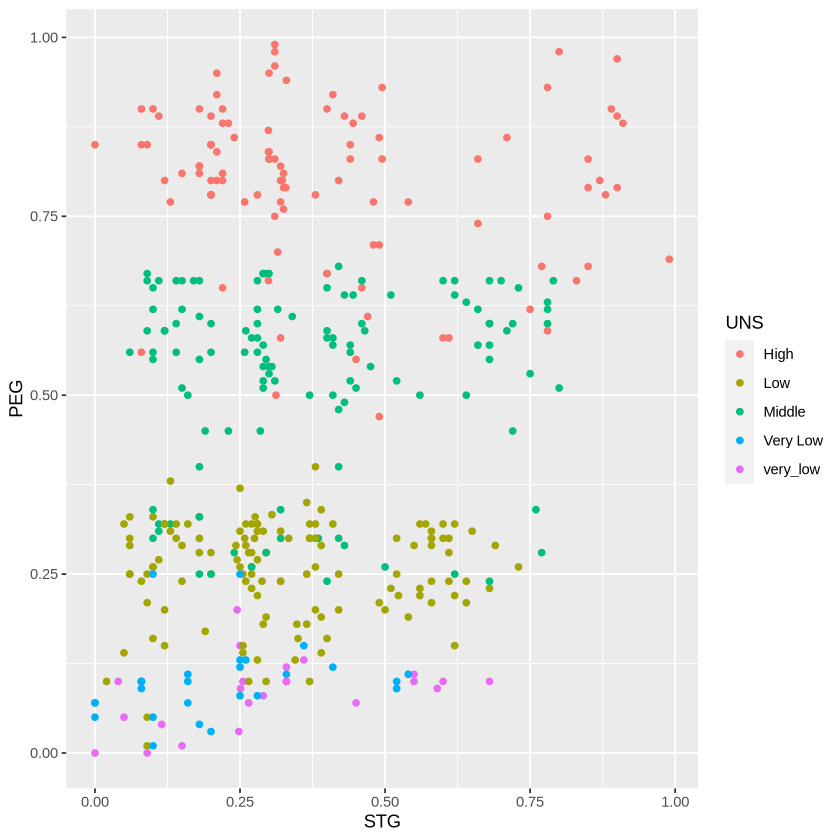

In [29]:
know_1 <- read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet = 2,range = "A1:F259")
know_2 <- read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet = 3,range = "A1:F146")
know_raw <- full_join(know_1,know_2)

know_raw

plot1 <- ggplot(know_raw, aes(x = STG, y= PEG, colour = UNS)) +
                geom_point() +
                labs(colour = "UNS")
plot1